##### imports
    import numpy as np
    import seaborn as sns
    import pandas as pd
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    import math
    import collections
    import itertools
    
##### creating dataframe
    pop_ages = pd.DataFrame(population_ages)
    pop_ages
    
##### mean
    pop_mean = sum(population_ages)/len(population_ages)
    pop_mean
    
##### KPI's 
    pop_ages.describe()
    
##### histogram
    plt.hist(pop_ages)
    
##### sample mean and median
    sample_ages = pop_ages.sample(n=100, random_state=22)
    print (sample_ages.mean())
    print (sample_ages.median())
    
### CONFIDENCE INTERVALS
##### sample
    sample_chol_levels = [66.0, 36.0, 73.0, 48.0, 81.0, 69.0, 75.0, 81.0, 73.0,
                      69.0, 101.0, 70.0, 50.0, 42.0, 36.0, 71.0, 65.0, 43.0, 76.0, 24.0]
    
    sample_chol_levels_array = np.array(sample_chol_levels)
    sample_chol_levels_array
    
##### mean
    sample_chol_levels_mean = np.mean(sample_chol_levels_array)
    sample_chol_levels_mean
    
##### standard deviation
    sample_chol_levels_std = np.std(sample_chol_levels, ddof = 1)
    sample_chol_levels_std
    
##### standard error
    sample_chol_levels_se = sample_chol_levels_std/np.sqrt(len(sample_chol_levels_std))
    sample_chol_levels_se
    
##### confidence intervals
    ct = stats.t.interval(confidence=0.95, df=len(sample_chol_levels)-1, loc=sample_chol_levels_mean, scale=sample_chol_levels_se)
    ct
    
##### reading csv
    with open("tested.csv","r") as file:
        content = file.read
        content
    
##### reading dataframe
    df = pd.read_csv(r"tested.csv")
    df.head()
    
##### info
    df.info()
    
##### sample
    sample_data = df.sample(n=100, random_state=22)
    sample_data.head()
    
##### filling missing values
    sample_data["Age"] = sample_data["Age"].fillna(df["Age"].median())
    sample_data.info()
    
##### confidence interval
    mu = sample_data["Age"].mean()
    mu

    sd = np.std(sample_data["Age"], ddof=1)
    sd

    se = sd/np.sqrt(len(sample_data['Age']))
    se

    ci = stats.t.interval(confidence=0.99, df=len(sample_data["Age"])-1, loc= x_bar, scale= se)
    ci

##### plotting
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, ax = plt.subplots()
    ax = sns.kdeplot(sample_data, ax=ax, label='Sample PDF')
    ax.axvline(mu, color="red", label=r'$\bar{x}$')
    ax.legend();

# MONDAY 29TH SEP,2025
## CONFIDENCE INTERVALS

In [1]:
# Import necessary libraries
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Plot styles
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

np.random.seed(15)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

In [2]:
pop_ages = pd.DataFrame(population_ages)
pop_ages

,0
0,60
1,40
2,49
3,49
4,44
...,...
249995,25
249996,29
249997,24
249998,28


In [3]:
pop_mean = sum(population_ages)/len(population_ages)
pop_mean

np.float64(42.985332)

In [4]:
pop_ages.describe()

,0
count,250000.000000
mean,42.985332
std,13.211628
min,18.000000
25%,29.000000
50%,47.000000
75%,54.000000
max,84.000000


(array([1.2884e+04, 7.3599e+04, 1.3532e+04, 1.0686e+04, 4.1189e+04,
        6.5358e+04, 2.8330e+04, 4.0270e+03, 3.7700e+02, 1.8000e+01]),
 array([18. , 24.6, 31.2, 37.8, 44.4, 51. , 57.6, 64.2, 70.8, 77.4, 84. ]),
 <BarContainer object of 10 artists>)

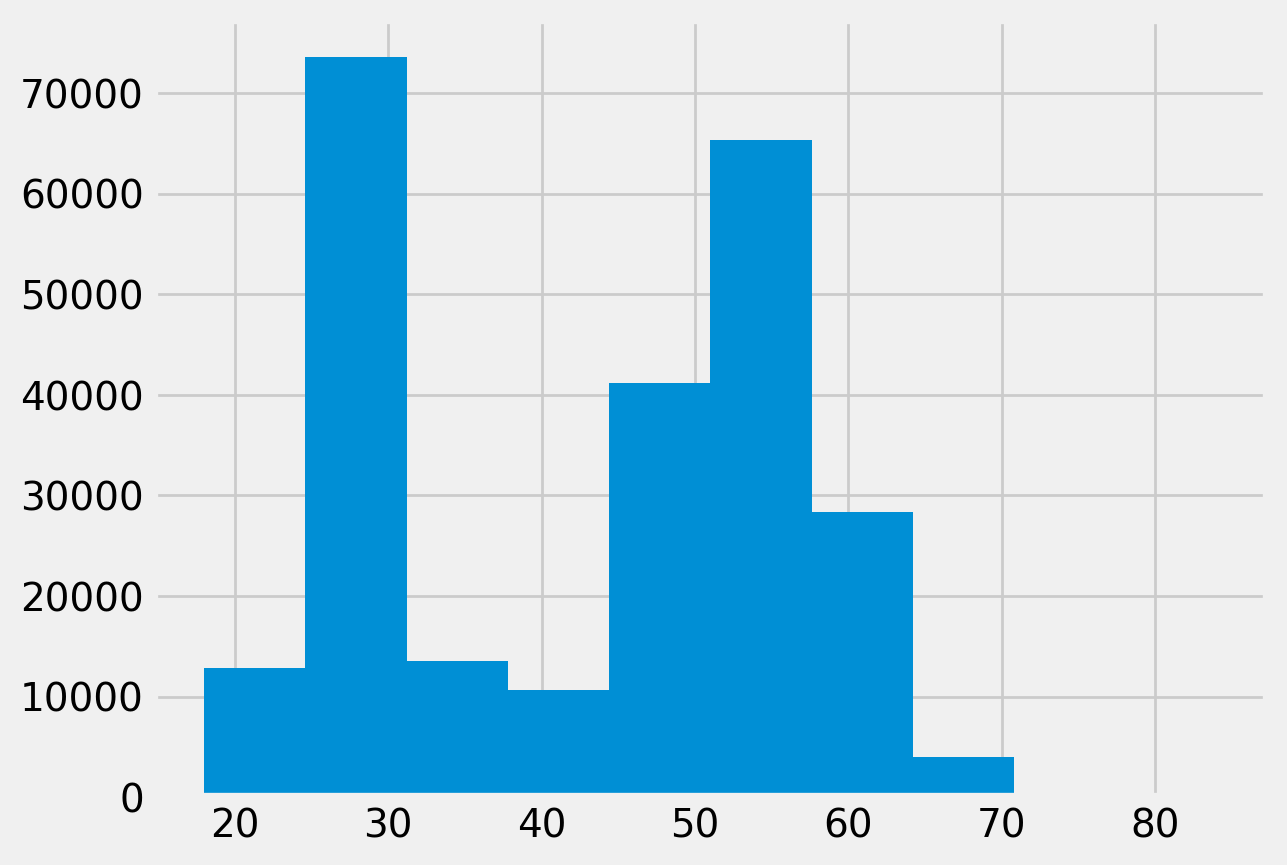

In [5]:
plt.hist(pop_ages)

In [6]:
sample = pop_ages.sample(n=500,random_state=22)
print (sample.mean())
print (sample.std())

0    42.672
dtype: float64
0    13.314766
dtype: float64


In [7]:
def conf_interval(pop, sample):
    '''
    Function input: population , sample 
    Function output: z-critical, Margin of error, Confidence interval
    '''
    sample_size = 500
    n = len(sample)
    x_hat = sample.mean()

    # Calculate the z-critical value using stats.norm.ppf()
    # Note that we use stats.norm.ppf(q = 0.975) to get the desired z-critical value 
    # instead of q = 0.95 because the distribution has two tails.
    z = None  #  z-critical value for 95% confidence

    #Calculate the population std from data
    pop_stdev = None

    # Calculate the margin of error using formula given above
    moe = None

    # Calculate the confidence interval by applying margin of error to sample mean 
    # (mean - margin of error, mean+ margin of error)
    conf = None
    
    return z, moe, conf

# Call above function with sample and population 
#z_critical, margin_of_error, confidence_interval = conf_interval(population_ages, sample)    
    
    

# print("z-critical value:")              
# print(z_critical)         
# print ('\nMargin of error')
# print(margin_of_error)
# print("\nConfidence interval:")
# print(confidence_interval)

# z-critical value:
# 1.959963984540054

# Margin of error
# 1.158026699800684

# Confidence interval:
# (41.86997330019931, 44.186026699800685)

In [8]:
# degrees of freedom

### mean

In [9]:
sample_chol_levels = [66.0, 36.0, 73.0, 48.0, 81.0, 69.0, 75.0, 81.0, 73.0,
                      69.0, 101.0, 70.0, 50.0, 42.0, 36.0, 71.0, 65.0, 43.0, 76.0, 24.0]

In [10]:
sample_chol_levels_mean = sum(sample_chol_levels)/len(sample_chol_levels)
sample_chol_levels_mean

62.45

### mean using numpy

In [11]:
chol_levels = np.array(sample_chol_levels)
chol_levels

array([ 66.,  36.,  73.,  48.,  81.,  69.,  75.,  81.,  73.,  69., 101.,
        70.,  50.,  42.,  36.,  71.,  65.,  43.,  76.,  24.])

In [27]:
chol_levels.mean()

np.float64(62.45)

In [12]:
chol_levels_mean = np.mean(chol_levels)
chol_levels_mean

np.float64(62.45)

# TUESDAY 30TH SEP,2025

### standard deviation

In [28]:
# x_bar = np.mean(sample_chol_levels)
chol_levels_std = np.std(sample_chol_levels, ddof = 1)
chol_levels_std

np.float64(19.209304214912432)

### standard error

In [59]:
chol_levels_se = chol_levels_std/(np.sqrt(len(sample_chol_levels)))
chol_levels_se

np.float64(4.295331002501743)

### confidence interval

In [21]:
ct = stats.t.interval(confidence=0.95, df=len(sample_chol_levels)-1, loc=chol_levels_mean, scale=chol_levels_se)
ct

(np.float64(53.4597688901183), np.float64(71.44023110988171))

### question
- we start with
  - arrays-  np.array(data)
  - mean-  np.mean(data)
  - std deviation-  np.std(data, ddof = 1)
  - std error-  data_std/np.sqrt(len(data))
  - confidence interval-  stats.t.interval(confidence= 0.95, df=len(data)-1, loc=data_mean, scale= data_se)

In [30]:
# WEIGHT OF PEOPLE,, 10 VALUES BETWEEN 55 AND 75
sample_weights = [56.3, 60,61,63,65,67,69,70,73,74.5]
sample_weights_array = np.array(sample_weights)
sample_weights_array

array([56.3, 60. , 61. , 63. , 65. , 67. , 69. , 70. , 73. , 74.5])

In [62]:
sampleweights_mean = np.mean(sample_weights_array)
sampleweights_mean

np.float64(65.88)

In [60]:
sample_weights_mean = np.mean(sample_weights)
sample_weights_mean

np.float64(65.88)

In [65]:
sample_weights_std = np.std(sample_weights,ddof= 1)
sample_weights_std

np.float64(5.889689673017115)

In [33]:
sample_weights_se = sample_weights_std/np.sqrt(len(sample_weights_array))
sample_weights_se

np.float64(1.7669069019051342)

In [34]:
confidence_intervals = stats.t.interval(confidence=0.95, df=len(sample_weights)-1, loc=sample_weights_mean, scale=sample_weights_se)
confidence_intervals

(np.float64(61.88297889575895), np.float64(69.87702110424104))

### titanic data set

In [36]:
data = pd.read_csv(r"tested.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
sample_data = data.sample(n=100,random_state=22)
sample_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
46,938,0,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7000,A9,C
271,1163,0,3,"Fox, Mr. Patrick",male,NaN,0,0,368573,7.7500,NaN,Q
40,932,0,3,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,NaN,C
388,1280,0,3,"Canavan, Mr. Patrick",male,21.0,0,0,364858,7.7500,NaN,Q
71,963,0,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [54]:
sample_data["Age"] = sample_data["Age"].fillna(data["Age"].median())
sample_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
46,938,0,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7000,A9,C
271,1163,0,3,"Fox, Mr. Patrick",male,27.0,0,0,368573,7.7500,NaN,Q
40,932,0,3,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,NaN,C
388,1280,0,3,"Canavan, Mr. Patrick",male,21.0,0,0,364858,7.7500,NaN,Q
71,963,0,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S


In [55]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 46 to 36
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  100 non-null    int64  
 1   Survived     100 non-null    int64  
 2   Pclass       100 non-null    int64  
 3   Name         100 non-null    object 
 4   Sex          100 non-null    object 
 5   Age          100 non-null    float64
 6   SibSp        100 non-null    int64  
 7   Parch        100 non-null    int64  
 8   Ticket       100 non-null    object 
 9   Fare         99 non-null     float64
 10  Cabin        23 non-null     object 
 11  Embarked     100 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 10.2+ KB


In [41]:
age = sample_data["Age"]

In [42]:
mu = data["Age"].mean()
mu

np.float64(30.272590361445783)

In [43]:
x_bar = age.mean()
x_bar

np.float64(30.300853658536585)

In [44]:
sd = np.std(age, ddof=1)
sd

np.float64(15.408746450101155)

In [51]:
se = sd/np.sqrt(len(sample_data["Age"]))
se

np.float64(1.5408746450101156)

In [56]:
ci = stats.t.interval(confidence=0.99, df=len(sample_data["Age"])-1, loc= x_bar, scale= se)
ci

(np.float64(26.25389208189636), np.float64(34.34781523517681))

# WEDNESDAY 1ST OCT,2025

In [1]:
import numpy as np
from scipy import stats
sample = np.array([15.46097664, 15.5930238 , 19.55426936, 16.54231132, 18.40712804,
                   13.33092129, 13.79141786, 12.44315636, 15.70385525, 12.48722755,
                   11.81594655, 15.22694063, 18.25064431, 15.93900563, 17.38471543,
                   15.02334988, 14.55826229, 16.64212199, 16.50657618, 13.44759329,
                   13.05467437, 14.151049  , 13.55036322, 13.37386788, 10.25090132,
                   16.45380807, 12.63016764, 11.90102614, 15.34426397, 15.2048003 ,
                   11.60623705, 16.10720081, 16.42266283, 13.74686281, 14.51850311,
                   15.59951107, 18.03269318, 14.35882143, 17.95626942, 14.06849303,
                   14.4507767 , 17.27149508, 15.06747021, 13.82402614, 12.40651465,
                   15.94104138, 16.8003216 , 18.45973001, 14.24757027, 14.06031845])

In [2]:
sample_mean= np.mean(sample)
sample_mean

np.float64(14.9794176958)

In [3]:
sample_sd = np.std(sample, ddof=1)
sample_sd

np.float64(2.042036093928169)

In [4]:
sample_se = sample_sd/(np.sqrt(len(sample)))
sample_se

np.float64(0.2887875138888596)

In [5]:
confi_interval = stats.t.interval(confidence=0.99, df=len(sample)-1, loc=sample_mean, scale=sample_se)
confi_interval

(np.float64(14.205481027993402), np.float64(15.753354363606599))

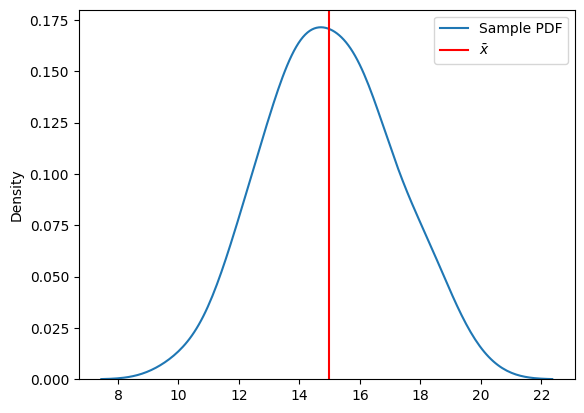

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
ax = sns.kdeplot(sample, ax=ax, label='Sample PDF')
ax.axvline(sample_mean, color="red", label=r'$\bar{x}$')
ax.legend();